<a href="https://colab.research.google.com/github/oscarcortez/opa-1-collab/blob/main/OPA_1_cryptobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting the data

Collecting two types of data through the Binance API using a streaming architecture.  

Thanks to this API, we can retrieve information on the prices of different markets (BTC-USDT, BTC-ETH, ...).
The goal will be to create a generic data retrieval function in order to have data from any market.
It will also be necessary to create a pre-processing script to reorganise the data coming out of the stream so that it is clean.

Recovering historical data, pre-processed to train our future model


In [106]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
data = yf.download("AAPL", period="1mo")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,192.460007,31458200
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.539993,41342300
2023-07-14,190.229996,191.179993,189.630005,190.690002,190.690002,41573900


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,192.460007,31458200
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.830002,48291400
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.610001,35175100


In [5]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

# download dataframe
data = pdr.get_data_yahoo("AAPL", start="1990-01-01", end="1990-12-31")

[*********************100%***********************]  1 of 1 completed


In [6]:
data.shape

(252, 6)

In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.264117,183198400
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265889,207995200
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266776,221513600
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.267662,123312000
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269435,101572800


In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-12-21,0.395089,0.404018,0.388393,0.401786,0.323030,346136000
1990-12-24,0.399554,0.401786,0.392857,0.392857,0.315851,58721600
1990-12-26,0.392857,0.395089,0.383929,0.390625,0.314057,103073600
1990-12-27,0.386161,0.392857,0.386161,0.388393,0.312262,97652800
1990-12-28,0.386161,0.388393,0.381696,0.383929,0.308673,63929600


In [9]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

<Axes: >

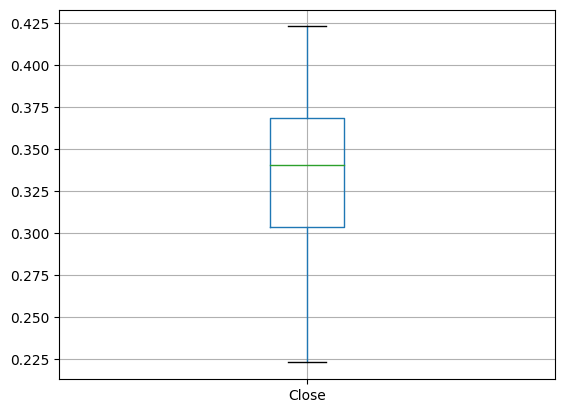

In [11]:
data.boxplot(['Close'])
# data cleaned

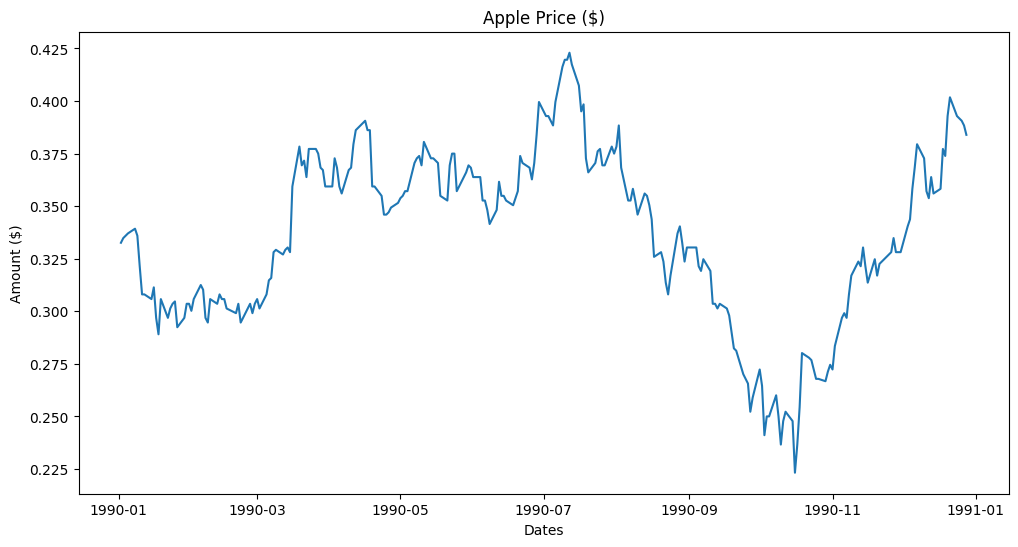

In [13]:

plt.plot()
plt.plot(data.index, data['Close'])
plt.title('Apple Price ($)')
plt.xlabel('Dates')
plt.ylabel('Amount ($)')
plt.rcParams["figure.figsize"] = (12,6)

plt.show()

In [18]:

data['year'] = data.index.year
data

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.264117,183198400,1990
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265889,207995200,1990
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266776,221513600,1990
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.267662,123312000,1990
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269435,101572800,1990
...,...,...,...,...,...,...,...
1990-12-21,0.395089,0.404018,0.388393,0.401786,0.323030,346136000,1990
1990-12-24,0.399554,0.401786,0.392857,0.392857,0.315851,58721600,1990
1990-12-26,0.392857,0.395089,0.383929,0.390625,0.314057,103073600,1990


In [84]:
x_date_sell = data['Close'].idxmax()
x_date_sell

Timestamp('1990-07-12 00:00:00')

In [76]:
y_price_sell = data.loc[x_date_sell].Close
y_price_sell

0.422991007566452

In [79]:
x_date_buy = data['Close'].idxmin()

In [81]:
y_price_sell

0.422991007566452

In [80]:
y_price_buy = data.loc[x_date_buy].Close
y_price_buy

0.22321400046348572

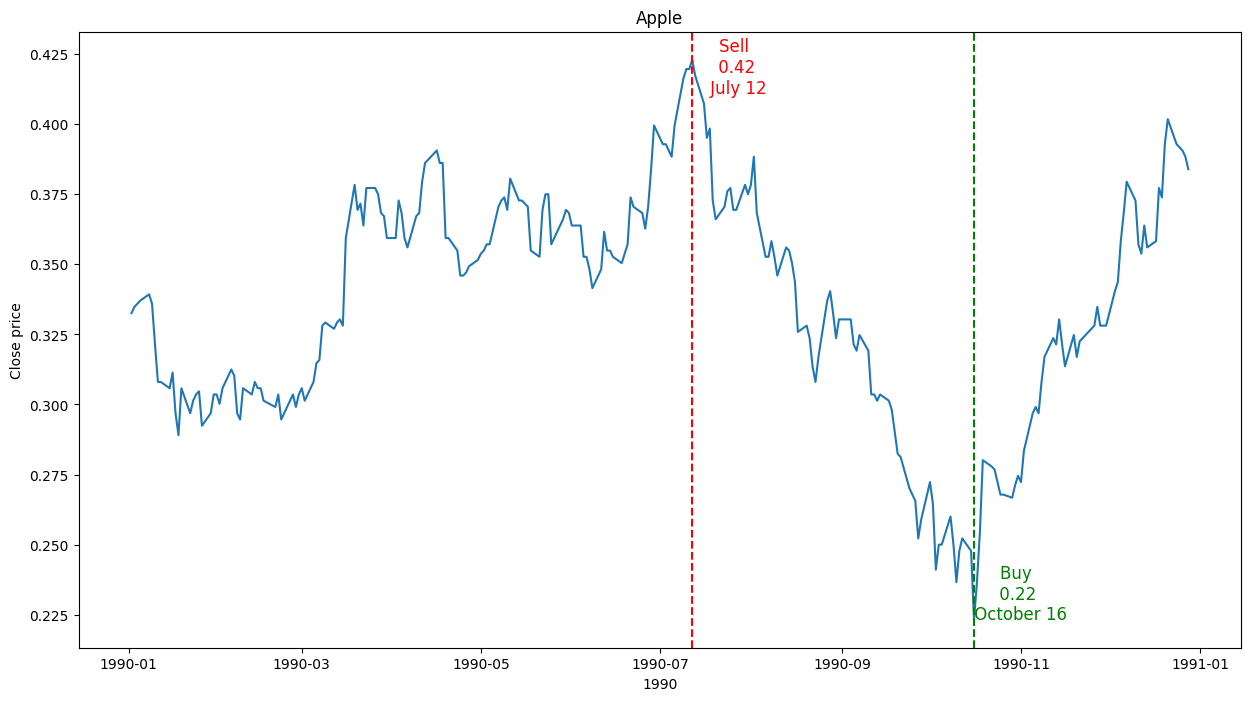

In [118]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=data.index, y=data.Close)

show_date_sell = f'{x_date_sell.strftime("%B")} {x_date_sell.day}'
show_date_buy = f'{x_date_buy.strftime("%B")} {x_date_buy.day}'

plt.text(x_date_sell + timedelta(days=15), y_price_sell - 0.012, f'Sell \n {round(y_price_sell,2)} \n {show_date_sell}', fontsize=12, ha='center', color = 'red')
plt.text(x_date_buy + timedelta(days=15), y_price_buy, f'Buy \n {round(y_price_buy,2)} \n {show_date_buy}', fontsize=12, ha='center', color = 'green')

plt.axvline(x=x_date_buy, color='green', linestyle='--')
plt.axvline(x=x_date_sell, color='red', linestyle='--')
plt.xlabel('1990')
plt.ylabel('Close price')
plt.title('Apple')
plt.show()